# EDA - King County House Pricing

![](images/kCNAFTN.jpg)

### Introduction and Overview

The purpose of this EDA is to find insights into the King County House Market, by analyzing the data in regards to three hypotheses, which we either confirm or discard during this EDA. The insights gained throughout this process will be used at a later point to get insight into a specific stakeholder situation and make fitting and relevant recommendations in regard to their situation.

In this notebook we first start with setting up our environment, meaning we import necessary libraries and read our dataset into a pandas data frame to work with throughout this notebook.

As the second step, we use basic analysis methods to get some insight and understanding about our data. With this understanding we than move to the point of hypothesis generation, where at least 3 hypothesis are stated. After we have our hypothesis defined, the next part is the data exploration, in which we check the distribution of the data feature to identify patterns or clues. 

In the next step, we clean and transform our data where needed and also drop columns if they do not provide valuable insight.
With this clean set of data, we then move on to explore the relationship of the features, find correlation between the features and maybe create new ones in order to drive our goal.

In the final step, the insight gained during this EDA will be transformed into a separate presentation with stakeholder recommendation, which will be summarized in the conclusion.

<br>

#### Table of contents
1. Getting started
2. Understanding the data
3. Generating our hypotheses
4. Getting a feel for the data
5. Data cleaning and transforming
6. Correlation within the data
7. Hypotheses analysis
8. Stakeholder recommendation
10. Further suggestions

<br>

### Getting started

As a first step we will import the necessary python libraries and load the dataset from the CSV file. 

In order to work with the dataset effectively, we also will have a look at the columns and what they represent:
To get some more insight before we start 

| column name | description |
| --- | --- |
| id | unique identified for a house |
|  dateDate | last selling date |
|  pricePrice | last selling price |
| bedroomsNumber | number of bedrooms |
| bathroomsNumber | number of bathrooms, where 0.5 accounts for a room with a toilet but no shower |
| sqft_livingsquare | living area of the house in sqft |
| sqft_lotsquare | area of the lot in sqft |
| floorsTotal | floors (levels) in house |
| waterfront | indicates if house is at the waterfront |
| view | has been viewed |
| condition | How good the condition is ( Overall ) from 1 to 5 |
| grade | overall grade given to the housing unit, based on King County grading system, from 1 to 13 (with 1-3 falls short, 7 has an average, 11-13 have a hight quality level of construction and design)  |
| sqft_above | square footage of house apart from basemen |
| sqft_basement | square footage of the basement |
| yr_built | year the house was built |
| yr_renovated | year the house was last renovated |
| zipcode | zip code of the area |
| lat | Latitude coordinate |
| long | Longitude coordinate |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors |


For the data handling we will mostly focus on pandas and numpy, while the visualisation will be done with either matplotlib, seaborn or some instances with plotly. Other libraries will not be used during this EDA.

In [63]:
# import relevant libraries
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# importing the seaborn theme for the plots
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

<br>

In the next step, we are loading the data and use df.head() to get the first glimpse on it.

In [64]:
# load data into the dataframe name and display the first five lines
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head(5)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         NaN  0.00  ...      7        1180            0.0   
1      7242    2.00        0.00  0.00  ...      7        2170          400.0   
2     10000    1.00        0.00  0.00  ...      6         770            0.0   
3      5000    1.00        0.00  0.00  ...      7        1050          910.0   
4      8080    1.00        0.00  0.00  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0     1955          0.00    98178 47.51 -122.26           1340        5650  
1     1951       1991.00    98125 47.72 -122.32           1690        7639  
2     1933           NaN    98028 47.74 -122.23           2720        8062  
3     1965          0.00    98136 47.52 -122.39           1360        5000  
4     1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

<br>

### Understanding the data

We start by inspecting the data from a general perspective, so that we understand more about missing values, data types and the structure of the dataframe, before we move to the basic descriptive statistics.

In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We can see that almost all our features have full sets of data. Only waterfront, view and yr_renovated have some missing values. Where view only has a minor amount of NaN, waterfront and especially yr_renovated show quite a significant amount of NaN.

Further down the EDA we will evaluate how to treat these values and get more insights into the individual columns. For now let's have some more detailed look at the data types of our features, especially date, yr_built and yr_renovated.

In [66]:
print(df['date'].head())
print(df['yr_built'].unique())
print(df['yr_renovated'].unique())

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962.

As can be seen, the date column is currently of type object. Thus, we likely convert this column later in this notebook into a datetime objects in order to use this for time-series analysis.

Additionally, we also aim to convert the yr_renovated to an int (so that the datatype is identical to yr_built), so that it can be easily plotted. However, this will also be handled in the data cleaning section further down the road.

<br>

To understand the dataset a bit better, we also will look at the overall duplicate entries, to see if some houses are continuously sold and resold. This way we might be able to understand how flexible the market is and to recognize potential price increases overtime.

For this purpose we will check if some of the house IDs are reoccurring.

In [67]:
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Only 177 entries are duplicates, giving only limited insight into the selling and re-selling possibilities in the Seattle market.

In [68]:
print(df['date'].agg(['max', 'min']))

max     9/9/2014
min    1/10/2015
Name: date, dtype: object


The minor amount of duplicate entries can be explained when looking further into the date column of the data set. The date range goes only from September 2014 to October 2015. With only 1 year of data it is very unlikely that many properties have been sold and resold in that limited time. Thus, we will likely not go to deep into a time analysis for this data set.

<br>

And last, but not least, let us have a look at the data again to find out which data is continuos or categorical. and see if we might need to change some of these in the cleaning phase of the EDA. We do this by looking at the frequency of unique values to understand if they are used in a categorical sense.

In [69]:
df.nunique().sort_values()

waterfront           2
view                 5
condition            5
floors               6
grade               11
bedrooms            12
bathrooms           29
zipcode             70
yr_renovated        70
yr_built           116
sqft_basement      304
date               372
long               751
sqft_living15      777
sqft_above         942
sqft_living       1034
price             3622
lat               5033
sqft_lot15        8682
sqft_lot          9776
id               21420
dtype: int64

While most of the features are not categorical by datatype, they are still used to classify (e.g. waterfront, view, condition, grade) and even the bedroom, bathrooms, and yr_built, yr_renovated could be used as categorical data, depending on requirements. Accordingly, we divide our data here into a first set of continuos and categorical data for further processing.

In [70]:
continuos = ['price', 'sqft_basement', 'date', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot', 'long', 'lat']
categorical = ['waterfront', 'view', 'floors', 'condition', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'yr_renovated', 'zipcode']

And last, but not least, we have a look at the basic descriptive statistics for all of our data features. However, for readability, the .describe() is called in two separate steps; once for the continous and once for the categorical data.

In [71]:
df.loc[:, continuos].describe()

price  sqft_living15  sqft_above  sqft_living  sqft_lot15  \
count   21597.00       21597.00    21597.00     21597.00    21597.00   
mean   540296.57        1986.62     1788.60      2080.32    12758.28   
std    367368.14         685.23      827.76       918.11    27274.44   
min     78000.00         399.00      370.00       370.00      651.00   
25%    322000.00        1490.00     1190.00      1430.00     5100.00   
50%    450000.00        1840.00     1560.00      1910.00     7620.00   
75%    645000.00        2360.00     2210.00      2550.00    10083.00   
max   7700000.00        6210.00     9410.00     13540.00   871200.00   

        sqft_lot     long      lat  
count   21597.00 21597.00 21597.00  
mean    15099.41  -122.21    47.56  
std     41412.64     0.14     0.14  
min       520.00  -122.52    47.16  
25%      5040.00  -122.33    47.47  
50%      7618.00  -122.23    47.57  
75%     10685.00  -122.12    47.68  
max   1651359.00  -121.31    47.78

- **price**: especially when looking at the price, we can see that we have a very high range from min to max, and a huge standard deviation, where we will at a later point verify that this our not outliers. This will be done in the data cleaning section

<br>

- **sqft_lot15**: this feature also has a very wide range from min to max and a high standard deviation. However, as this column indicates the total sqft_lot of the nearest 15 neighbors, this wide range can be explained due to different neighborhood types (e.g. crowded city center vs. rural country-side)

<br>

- **sqft_lot**: identical to the sqft_lot15, this feature is showing a wide range and thus a big standard deviation and will be evaluated more in detail during the cleaning process


In [72]:
df.loc[:, categorical].describe()

waterfront     view   floors  condition    grade  yr_built  bedrooms  \
count    19221.00 21534.00 21597.00   21597.00 21597.00  21597.00  21597.00   
mean         0.01     0.23     1.49       3.41     7.66   1971.00      3.37   
std          0.09     0.77     0.54       0.65     1.17     29.38      0.93   
min          0.00     0.00     1.00       1.00     3.00   1900.00      1.00   
25%          0.00     0.00     1.00       3.00     7.00   1951.00      3.00   
50%          0.00     0.00     1.50       3.00     7.00   1975.00      3.00   
75%          0.00     0.00     2.00       4.00     8.00   1997.00      4.00   
max          1.00     4.00     3.50       5.00    13.00   2015.00     33.00   

       bathrooms  yr_renovated  zipcode  
count   21597.00      17755.00 21597.00  
mean        2.12         83.64 98077.95  
std         0.77        399.95    53.51  
min         0.50          0.00 98001.00  
25%         1.75          0.00 98033.00  
50%         2.25          0.00 98065.00  
75%         2.50          0.00 98118.00  
max         8.00       2015.00 98199.00

While the descriptive statistic for the categorical values is not much surprising and most of the data just confirms what we expected (e.g. in terms of grade, condition, waterfront, view, etc.), the max number for the bedroom looks suspicious.

- **bedrooms**: 33 bedrooms looks very much like an unexpected outlier or maybe a error in entering the data.


In [73]:
bedrooms_max = df.query('bedrooms > 30')
display(bedrooms_max)

fig = px.scatter_mapbox(bedrooms_max, lat="lat", lon='long', hover_name="zipcode", size='id',
                        zoom=15, height=900, title="House with 33 bedrooms?")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014 640000.00        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000    1.00        0.00  0.00  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
15856          580.0     1947          0.00    98103 47.69 -122.33   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

![](images/bedrooms.png)

After checking the data entry with the 33 bedrooms in terms of size and location, the 33 can be considered to be an error and will be corrected to a 3 in the data cleaning section.

<br>

### Generating our hypotheses

In this section we create some hypotheses to "guide" us through the next steps. We are trying to come up with wise assumptions, how certain features might affect our target variable and we will use this EDA to either confirm or disprove them and maybe even show new insights during this process. Based on the first insights into the data and the data columns available, we assume:

<br>

1. house pricing is clustered by ZIP codes / grouped by longitude & latitude  
    e.g. expensive houses can be mostly found in certain ZIP code areas

    <br>
    
2. the age of an house impacts the official grade and the score for the overall condition  
    e.g. the older an house, the lower the grade and overall condition

    <br>
 
3. the number of bedrooms has a higher impact on the house pricing than the number of bathrooms  
    e.g. a house price is mostly dictated by the amount of bedrooms, not the bathrooms

<br>

### Getting a feel for the data

After having run some basic descriptive statistics on the dataset, let us have a first look at the distribution of the individual dataset features. 

As we do not have too many features, we have a look at the distribution of all of them and start by looking at the features which contain continuos data. This is done by creating separate histograms for each of them.

As a short reminder, the following features have been classified as continuos:
```
continuos = ['price', 'sqft_basement', 'date', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot', 'long', 'lat']
```

<br>

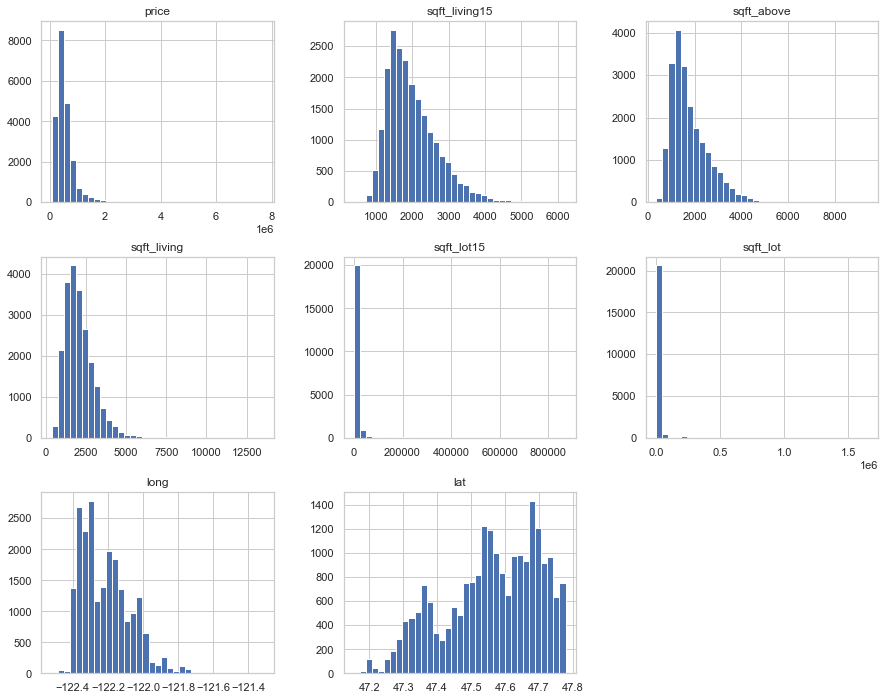

In [74]:
df.loc[:, continuos].hist(figsize=(15,12), bins=35);

sqft_living, sqft_above and sqft_living15 have a very similar distribution, relatively in line with the price distribution. All features (besides long and lat) show a strong positive skewed distribution.


Next, let's have a look at the categorical data. For this purpose we are going to look at a countplot for these individual features. You will notice that zipcode has been excluded as we will look at this features separately.

```
categorical = ['waterfront', 'view', 'floors', 'condition', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'yr_renovated']
```

0.00    19075
1.00      146
Name: waterfront, dtype: int64

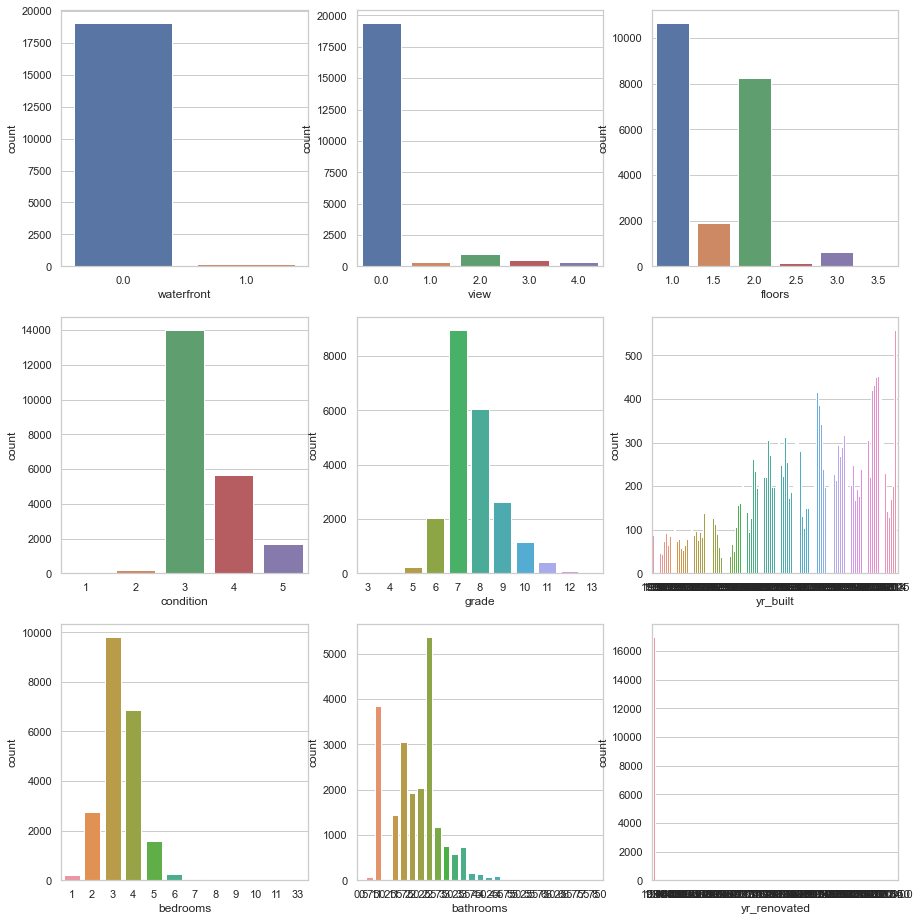

In [75]:
categorical = ['waterfront', 'view', 'floors', 'condition', 'grade', 'yr_built', 'bedrooms', 'bathrooms', 'yr_renovated']

fig, ax = plt.subplots(3, 3, figsize=(15, 16))

counter = int(0)

for index, column in enumerate(categorical):
    sns.countplot(df[column], ax=ax[counter,(index % 3)])
    if index == 2 or index == 5 or index == 8:
        counter += 1


df['view'].value_counts()
df['waterfront'].value_counts()

There is nothing too surprisingly in there. However, the waterfront and view feature already show a strong trend and we will look into them more to see if we need this data or if it might become irrelevant for our purpose.

The bathroom plot is a bit crowded, as the bins are split into .0, .25, .5, .75. As we could not find any insight into the what the 0.25 or 0.75 refers to (0.5 is a bathroom with only a toilet, but no shower), we will round these values done to the 0.0 and 0.5 respectively in the data cleaning part.

As the yr_renovated plot is not really insightful, as most of the data entries have a 0 listed when no renovation has been done we will plot this feature again. However, in order to get some insight into this feature we will shortly look at a data frame solely consisting out of renovated houses.

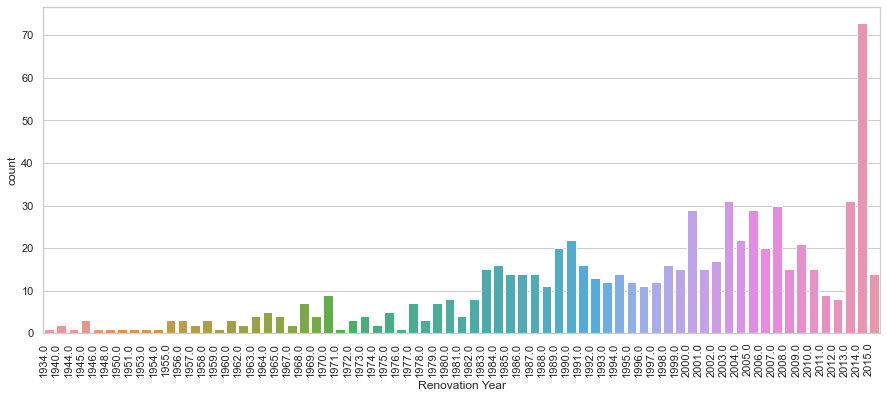

In [76]:
renovated_only = df[df['yr_renovated'] != 0]

plt.figure(figsize=(15,6))
a = sns.countplot(renovated_only['yr_renovated'])

a.set_xticklabels(a.get_xticklabels(), rotation=90, horizontalalignment='right')
a.set_xlabel('Renovation Year');

This countplot is quiet in line with the expectations. The drops from 2009 to 2013 could still be related to the financial crisis which started at 2008. From 2014 onwards there seems to be a trend for renovation, however, as we have only a limited data set, additional data would be needed to confirm or discard this assumption.

But to confirm the rough timeline trend, let us have a look at the yr_built plot, to understand if this two features are in line with each other.

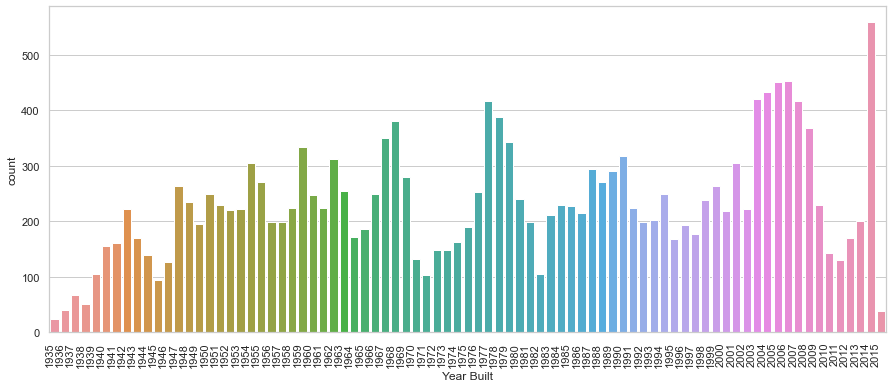

In [77]:
built_2000 = df[df['yr_built'] > 1934]

plt.figure(figsize=(15,6))
a = sns.countplot(built_2000['yr_built'])

a.set_xticklabels(a.get_xticklabels(), rotation=90, horizontalalignment='right')
a.set_xlabel('Year Built');

The year build plot shows a consistent growth that was regularly interrupted by social and political circumstances. However, in comparison renovations are a slower trend and less impactful as the newly built properties.

For the last years (2008-2014) the plot for the yr_built is roughly in line with the yr_renovated trend, also showing a strong drop from 2009 onwards and a major increase again from 2014 on.

<br>

As we are also interested about the geographical impact on the housing data set, we will also check this distribution using the longitude and latitude and directly highlighting the ZIP Code to get a bit of a feel for the city.

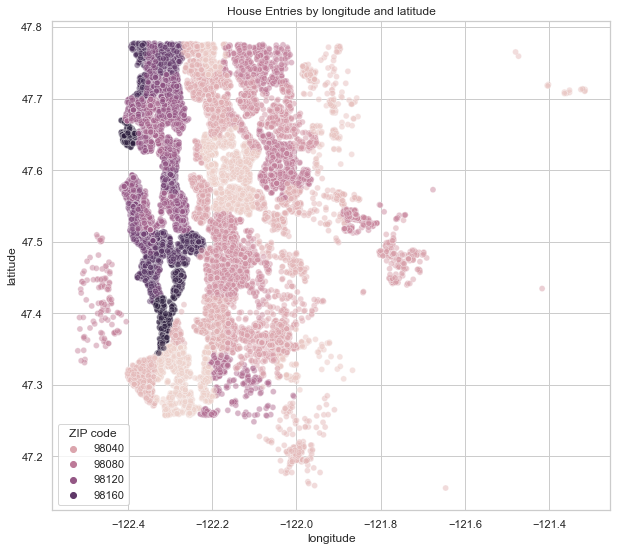

In [78]:
#print(df['zipcode'].unique())
plt.figure(figsize=(10, 9))
sns.scatterplot(y='lat', x='long', hue='zipcode', data=df, alpha=0.5)

plt.title('House Entries by longitude and latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(title='ZIP code');

This scatterplot gives us only basic insights, but helps us to understand roughly the outline of Seattle and the distribution of our data in a geographical sense. The color highlights the different ZIP codes.

As one of our hypothesis is looking into the relation between ZIP codes and house pricing, we will look into this more detailed later on.

<br>

### Data cleaning and transforming

As already noticed during the initial exploration phase, we have some column features that we have to treat with some additional attention in order to make them work for us.

First, we will transform the existing date column into an actual date time object, so that we potentially could do some date time analysis. We will also transform our price from float to int, as we actually are not interested in the decimals.

In [79]:
# transforming the date column into an datetime object
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [80]:
# transform price from float into int
df['price'] = df['price'].astype(int)

As we saw that for some of our features we have very big ranges, we also will have a look at the largest and smalles elements for the price, to make sure that these are not unwanted outliers.

In [81]:
display(df.nlargest(5, 'price'))
display(df.nsmallest(2, 'price'))

id       date    price  bedrooms  bathrooms  sqft_living  \
7245  6762700020 2014-10-13  7700000         6       8.00        12050   
3910  9808700762 2014-06-11  7060000         5       4.50        10040   
9245  9208900037 2014-09-19  6890000         6       7.75         9890   
4407  2470100110 2014-08-04  5570000         5       5.75         9200   
1446  8907500070 2015-04-13  5350000         5       5.00         8000   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245     27600    2.50        0.00  3.00  ...     13        8570   
3910     37325    2.00        1.00  2.00  ...     11        7680   
9245     31374    2.00        0.00  4.00  ...     13        8860   
4407     35069    2.00        0.00  0.00  ...     13        6200   
1446     23985    2.00        0.00  4.00  ...     12        6720   

      sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
7245         3480.0     1910       1987.00    98102 47.63 -122.32   
3910         2360.0     1940       2001.00    98004 47.65 -122.21   
9245         1030.0     2001          0.00    98039 47.63 -122.24   
4407         3000.0     2001           NaN    98039 47.63 -122.23   
1446         1280.0     2009          0.00    98004 47.62 -122.22   

      sqft_living15  sqft_lot15  
7245           3940        8800  
3910           3930       25449  
9245           4540       42730  
4407           3560       24345  
1446           4600       21750  

[5 rows x 21 columns]

id       date  price  bedrooms  bathrooms  sqft_living  \
15279    40000362 2014-05-06  78000         2       1.00          780   
465    8658300340 2014-05-23  80000         1       0.75          430   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15279     16344    1.00        0.00  0.00  ...      5         780   
465        5050    1.00         NaN  0.00  ...      4         430   

       sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
15279            0.0     1942           NaN    98168 47.47 -122.28   
465              0.0     1912          0.00    98014 47.65 -121.91   

       sqft_living15  sqft_lot15  
15279           1700       10387  
465             1200        7500  

[2 rows x 21 columns]

The largest as well as the smallest price values seem to be reasonable entries, which represent valid house entries within the dataframe. Thus, we will not remove any outliers based on the max and min value.

<br>

One additional data adjustment we needed to do was in regards to the house with 33 bedrooms. This number will be overwritten with 3.


In [82]:
df['bedrooms'] = df['bedrooms'].replace({33:3})

However, we still have some columns which we need to check in regards to missing data:

In [83]:
# viewing the amount of null entries per column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view is quite irrelevant for us, but also only has a minor amount of missing data. However, as we are not using this column to get any insight, we will drop it in the next step.

The waterfront feature might be relevant for our stakeholder. Therefore we are keeping this column, but will replace the NaN values with the mode of this column. This means that we are replacing the NaNs with a 0, indicating that this house is not placed at the waterfront. As this is a relevant feature for our stakeholder, we rather treat missing data in this column as "not at the waterfront" than recommending a wrong house.

In regards to the yr_renovated feature: as we are interested in the effect of the house age in regards to the housing price, the yr_renovated column might give interesting insights in this topic and we will not remove it. However, we also have many 0 values in there, which likely represent a non-renovated status and for this EDA we will interpret missing data in this column also as not renovated and replace it with a 0.

In [84]:
# dropping unnecessary columns
df.drop('view', axis=1, inplace=True)

In [85]:
# replacing all NaNs with 0, which is the most common entry as well as the indication that this feature is not fullfilled.
df.fillna(0, inplace=True)
df.isnull().sum()

# additionally converting the yr_renovated into a int to fit in line with the yr_built column
df['yr_renovated'] = df['yr_renovated'].astype(int)

<br>

In addition to dropping columns, we might also think about adding some additional features, which are helping us to gain insight.


Thus, let us look at the price column again and plot this feature together with the sqft_living and sqft_lot. I assume that there will be a correlation between price and size, as logically speaking the bigger a house or a lot, the more expensive it will very likely be.

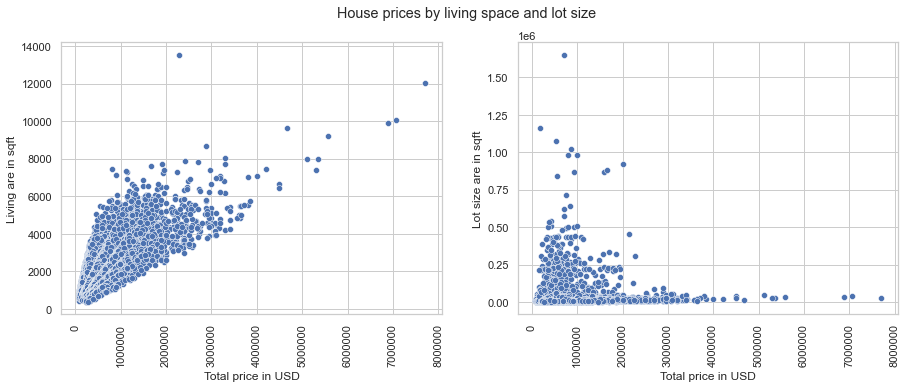

In [131]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(x='price', y='sqft_living', data=df, ax=ax[0])
sns.scatterplot(x='price', y='sqft_lot', data=df, ax=ax[1])

plt.suptitle('House prices by living space and lot size')
ax[0].set_xlabel('Total price in USD')
ax[0].set_ylabel('Living are in sqft')

ax[1].set_xlabel('Total price in USD')
ax[1].set_ylabel('Lot size are in sqft')

ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')

ax[0].tick_params(axis='x',labelrotation=90)
ax[1].tick_params(axis='x',labelrotation=90)


While we can clearly see the correlation between living area and price, the correlation between lot size and price is not as clear. I assume that this is partly due to the outskirts area, where lot prices is a lot cheaper and not directly impacting the prices. We will look further into this during our hypothesis sections.

Still, we will take the opportunity here, to create two new columns 'price_per_sqft_living' and 'price_per_sqft_lot' in order to be able to compare different size houses and understand the relative price of a house or lot.

In [87]:
df['price_per_sqft_living'] = df['price'] / df['sqft_living']
df['price_per_sqft_lot'] = df['price'] / df['sqft_lot']
df.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  condition  ...  sqft_basement  yr_built yr_renovated  \
0    1.00        0.00          3  ...            0.0      1955            0   
1    2.00        0.00          3  ...          400.0      1951         1991   
2    1.00        0.00          3  ...            0.0      1933            0   
3    1.00        0.00          5  ...          910.0      1965            0   
4    1.00        0.00          3  ...            0.0      1987            0   

   zipcode   lat    long  sqft_living15  sqft_lot15  price_per_sqft_living  \
0    98178 47.51 -122.26           1340        5650                 188.05   
1    98125 47.72 -122.32           1690        7639                 209.34   
2    98028 47.74 -122.23           2720        8062                 233.77   
3    98136 47.52 -122.39           1360        5000                 308.16   
4    98074 47.62 -122.05           1800        7503                 303.57   

   price_per_sqft_lot  
0               39.27  
1               74.29  
2               18.00  
3              120.80  
4               63.12  

[5 rows x 22 columns]

With this two columns, we can make a relative comparison of the price per sqft. However, one more column will be added in form of a bucket for the sqft pricing, so that we can use the grouping to visualise further price hotspots within Seattle.

In [88]:
df['price_per_sqft_living'].describe()

count   21597.00
mean      264.14
std       110.00
min        87.59
25%       182.29
50%       244.64
75%       318.33
max       810.14
Name: price_per_sqft_living, dtype: float64

In [89]:
pricing_bins = np.array([0, 100, 200, 300, 400, 500, 700, 900])
labels = ['100', '100-200', '200-300', '300-400', '400-500', '500-700', '>700']
# pricing_bins[:-1])
df['price_group_sqft_living'] = pd.cut(df['price_per_sqft_living'], bins=pricing_bins, labels=labels)

df.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  condition  ...  yr_built  yr_renovated zipcode   lat  \
0    1.00        0.00          3  ...      1955             0   98178 47.51   
1    2.00        0.00          3  ...      1951          1991   98125 47.72   
2    1.00        0.00          3  ...      1933             0   98028 47.74   
3    1.00        0.00          5  ...      1965             0   98136 47.52   
4    1.00        0.00          3  ...      1987             0   98074 47.62   

     long  sqft_living15  sqft_lot15  price_per_sqft_living  \
0 -122.26           1340        5650                 188.05   
1 -122.32           1690        7639                 209.34   
2 -122.23           2720        8062                 233.77   
3 -122.39           1360        5000                 308.16   
4 -122.05           1800        7503                 303.57   

   price_per_sqft_lot  price_group_sqft_living  
0               39.27                  100-200  
1               74.29                  200-300  
2               18.00                  200-300  
3              120.80                  300-400  
4               63.12                  300-400  

[5 rows x 23 columns]

Additionally, we are adding two more columns in regard to the yr_built and yr_renovated, as we are directly interested into the age of a house and a potential time since the last renovation and how these features might impact the pricing. 

Thus, we create two additional column, where the age (in years) and the age of the renovation are stated for further insights. As this dataset is only a snapshot from 2015, the age will be calculated as the period between yr_built and date, as this gives us a understanding of the price, condition and grade of that time. The same will be done for the yr_renovated.

In [90]:
df['age'] = df['date'].dt.year - df['yr_built']
df['age_renovation'] = df['date'].dt.year - df['yr_renovated']
#print(df['age_renovation'].unique())

<br>

In order to allign the format of the yr_renovated with the last_renovation column, the entries with value 2022 are replaced with 0. Thus, meaning that no renovation has been taken place for this property.

In [91]:
df['age_renovation'] = df['age_renovation'].replace({2014:0, 2015:0})

And in order to use these values later on easily, let's create bins for that in the style of the price group we created above, so that we have access to further processed data, which can be grouped to gain valuable insights.

In [92]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,1000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels)

# partition the age_renovation into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['not renovated','1-5','6-10','11-25','26-50','51-75','>75']
df['age_renovation_bin'] = pd.cut(df['age_renovation'], bins=bins, labels=labels)

#df.head()

As the final step, let us have a look again at the bathroom values.

In [93]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])



While we know that a 0.5 bathroom counts as a toilet without a shower, we also have more values in there, which we are not able to identify due to unclear documentation. Thus, we will remove the 0.25 and 0.75 values and will round them down to the nearest full or half bathroom ;)

In [94]:
df['bathrooms'] = df['bathrooms'].replace({0.75:0.5, 1.25:1, 1.75:1.5, 2.25:2, 2.75:2.5, 3.25:3, 3.75:3.5, 4.25:4, 4.75:4.5, 5.25:5, 5.75:5.5, 6.25:5, 6.75:6.5, 7.25:7, 7.75:7.5})

<br>

### Correlation within the data

After cleaning and somewhat transforming the data, let us look a bit deeper into the correlation of the different features. 
We will do this with a basic correlation matrix and see if we can find assumed or unlikely correlations.

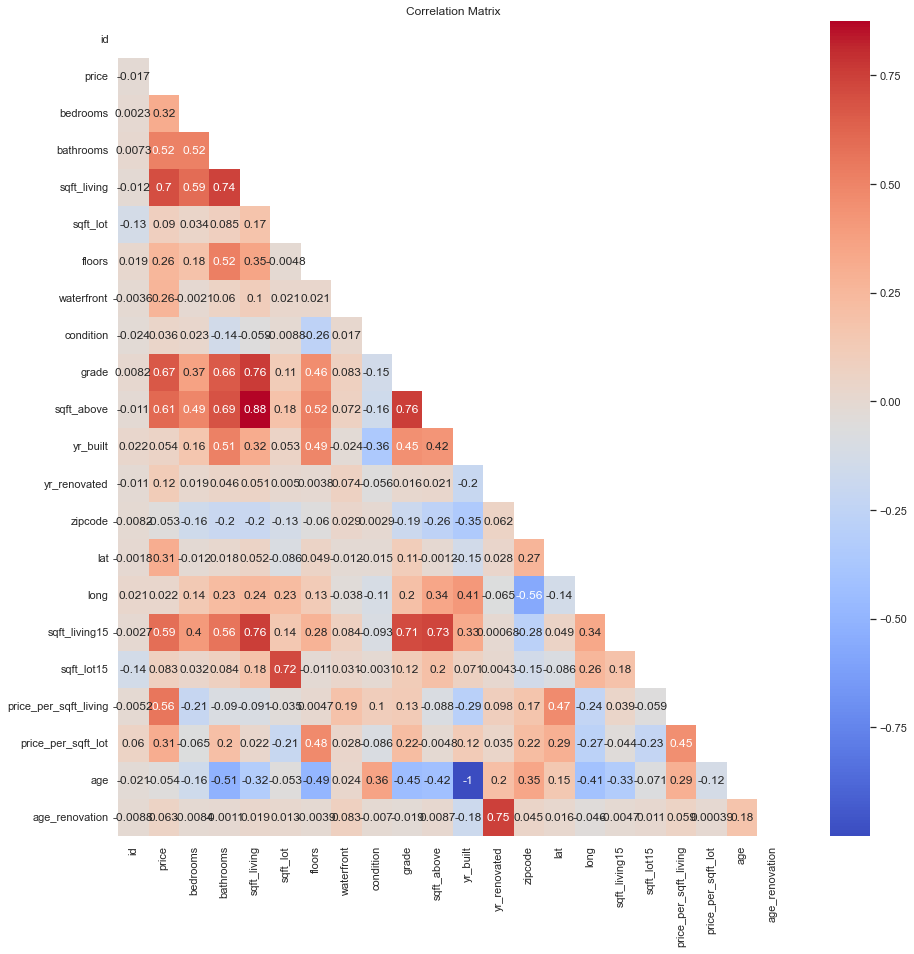

In [95]:
corr_mat = df.corr()
plt.figure(figsize=(15, 15))

matrix = np.triu(corr_mat.corr())

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', mask=matrix)

plt.title('Correlation Matrix');

Unsurprisingly, there is a strong correlation between the individual features describing either the size of the house, lot, basement or living area. 

Additionally, the grade shows a strong correlation with the price and size features, like sqft_living and sqft_living15, which is a parameter used, to indicate the size of the nearest 15 neighbors houses, but no significant correlation with the sqft_lot and sqft_lot15, the feature used to describe the overall size of the nearest 15 neighbors lots. This might indicate that the overall lot size has only a minor impact on the overall grade.

Interestingly is that, while condition has a slightly positive correlation with the age, the grade has a relatively negative correlation. As our second hypothesis is looking into this relation, this already gives us some indication about the potential outcome.

Price is another feature which shows quite some stronger correlation to other features. We will look a bit further into the correlation between pricing and bathrooms/bedrooms when working on our hypotheses, but for now we will take the condition and grade.

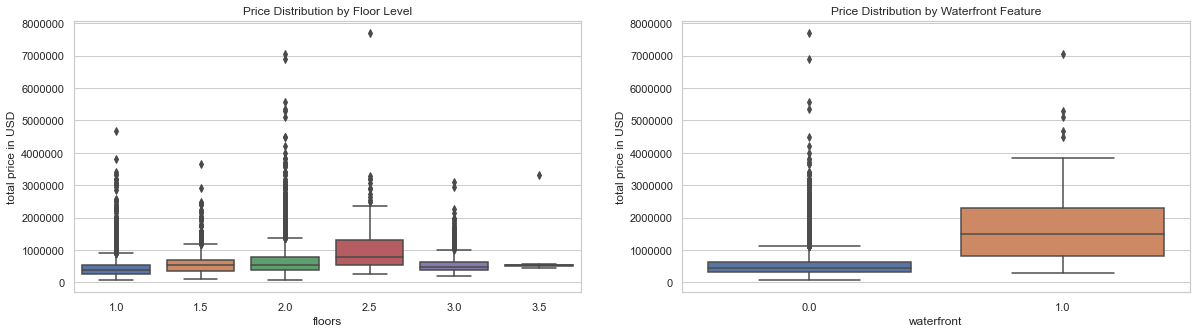

In [117]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

sns.boxplot(x='floors', y='price', data=df, ax=ax[0])
sns.boxplot(x='waterfront', y='price', data=df, ax=ax[1])

ax[0].set_title('Price Distribution by Floor Level')
ax[1].set_title('Price Distribution by Waterfront Feature')

ax[0].set_ylabel('Total price in USD')
ax[1].set_ylabel('Total price in USD')

ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y');

While the grade seems to have an direct impact on the price, the condition is less impactful and has no direct indication for the value of the house. However, in the next section we will take the opportunity to look deeper into these two features.

### Hypotheses analysis

#### 1. House pricing is clustered by ZIP codes / grouped by longitude & latitude  

In order to evaluate this hypothesis, we are going to focus on the column price_per_sqft_living (as in comparison to price_per_sqft_lot), as want to focus on the relative price of living instead of the total price. This way, we evaluate the price per sqft for the whole King County area, without having to focus too much on the total size of the property.

As a first check, we make a simple scatter plot by longitude and latitude with the raw data and use the price_group_sqft_living as the color for the marker to identify hot spots in terms of pricing.

In [97]:
df = df.sort_values('price_group_sqft_living')

fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="zipcode", color='price_group_sqft_living', hover_data=["zipcode", "lat", "long"],
                         color_discrete_sequence=px.colors.cyclical.IceFire, zoom=9, height=900, title="King County Housing Overview", labels={"price_group_sqft_living": "Price Group in price/sqf"})

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

![price per sqft](images/geo1.png)

We can directly identify some hot spots on the map, which indicates that the geographical locations seems to have an impact on the price, with some expensive clusters being located in the central area of the map. Moving away from this central cluster into the outskirts, we can identify a decrease in pricing.

Additionally, we see a lot of expensive spots directly at the waterfront even around the cheaper clusters.

<br>

However, as the map is relatively crowded due to the big amount of data entries plotted, we use the next step to look in a more average statistic, by grouping the data by ZIP codes.

In [98]:
# create a new data frame with price per sqft, longitude and latitude grouped by the ZIP code
zipcode_price = df.groupby('zipcode').mean()[['price_per_sqft_living', 'long', 'lat']].reset_index()

# plot the zip codes and the average price per sqft on the average longitude and latitude of King County
fig = px.scatter_mapbox(zipcode_price, lat="lat", lon="long", hover_name="zipcode", color='price_per_sqft_living', #hover_data=["city", "state", "country"],
                        size='price_per_sqft_living', color_discrete_sequence=px.colors.cyclical.IceFire, zoom=9, height=900, title="King County - average pricing by ZIP code")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

![](images/geo2.png)

With this second map, we get a bit of a clearer insight into the price ranges per ZIP code, while still maintaining the latitude/longitude information in a rough way.

We can clearly identify the most expensive areas, with Medina and Clyde Hill being the most expensive city (districts), followed by Bellevue, Washington Park, Capitol Hill, Queen Ann, University District, etc.

The clusters are getting less expensive when moving further away from the city, with city districts being cheaper than districts which seem to be more on the countryside. Waterfront again plays an important role on house pricing and has an immediate increasing effect on the price.

In [99]:
zipcode_price['price_per_sqft_living'].describe()

count    70.00
mean    267.33
std      91.79
min     148.92
25%     192.63
50%     251.96
75%     314.30
max     568.24
Name: price_per_sqft_living, dtype: float64

#### 2. The age of an house impacts the official grade and the score for the overall condition

In the second assumption we want to check the impact of the yr_built or rather the age of the house on the conditions, with the assumption that an older house having a lower grade and a lower overall condition.

We will start by drawing some simple plots, like a histogram of the condition and grade, as well as lineplots to understand the basic descriptive statistics of the age_bins in relation to the grade and condition.

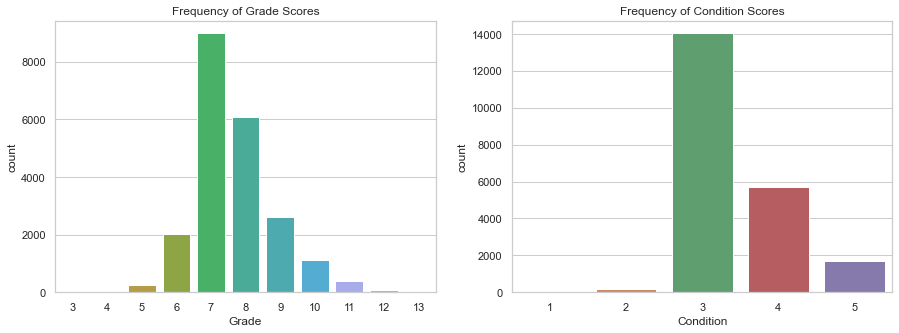

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(df['condition'], ax=ax[1])
sns.countplot(df['grade'], ax=ax[0])

ax[0].set_title('Frequency of Grade Scores')
ax[1].set_title('Frequency of Condition Scores')


ax[0].set_xlabel('Grade')
ax[1].set_xlabel('Condition')

plt.savefig('images/grade_condition_distribution.png')

The grade and condition are more or less normal distributed, where the condition however is positively skewed and centered around 3.

Now let us look at the correlation between the grade and condition and the age of the properties.

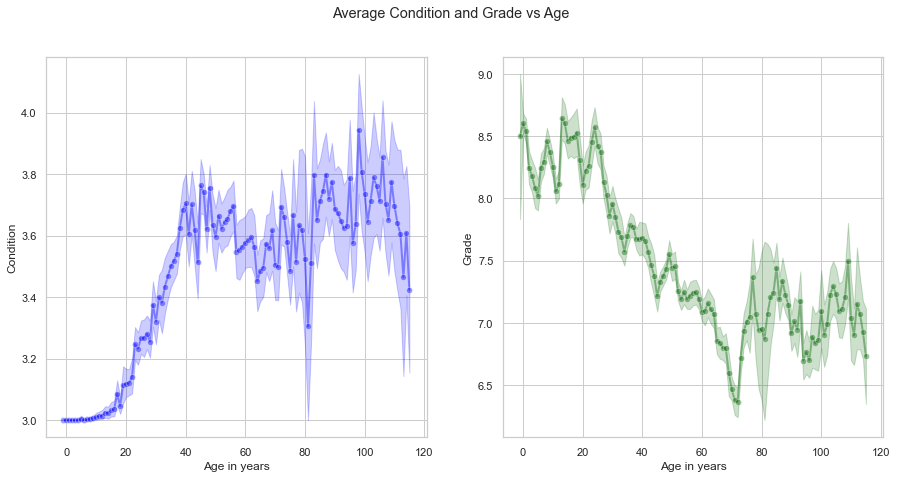

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.lineplot(data=df, x='age', y='condition', alpha=0.4, ax=ax[0], linewidth=2, color='blue', marker='o')
sns.lineplot(data=df, x='age', y='grade', alpha=0.4, ax=ax[1], linewidth=2, color='darkgreen', marker='o')

plt.suptitle('Average Condition and Grade vs Age')

ax[0].set_xlabel('Age in years')
ax[1].set_xlabel('Age in years')

ax[0].set_ylabel('Condition')
ax[1].set_ylabel('Grade')

ax[0].grid(True)
ax[1].grid(True)

plt.savefig('images/age_vs_grade_condition.png')

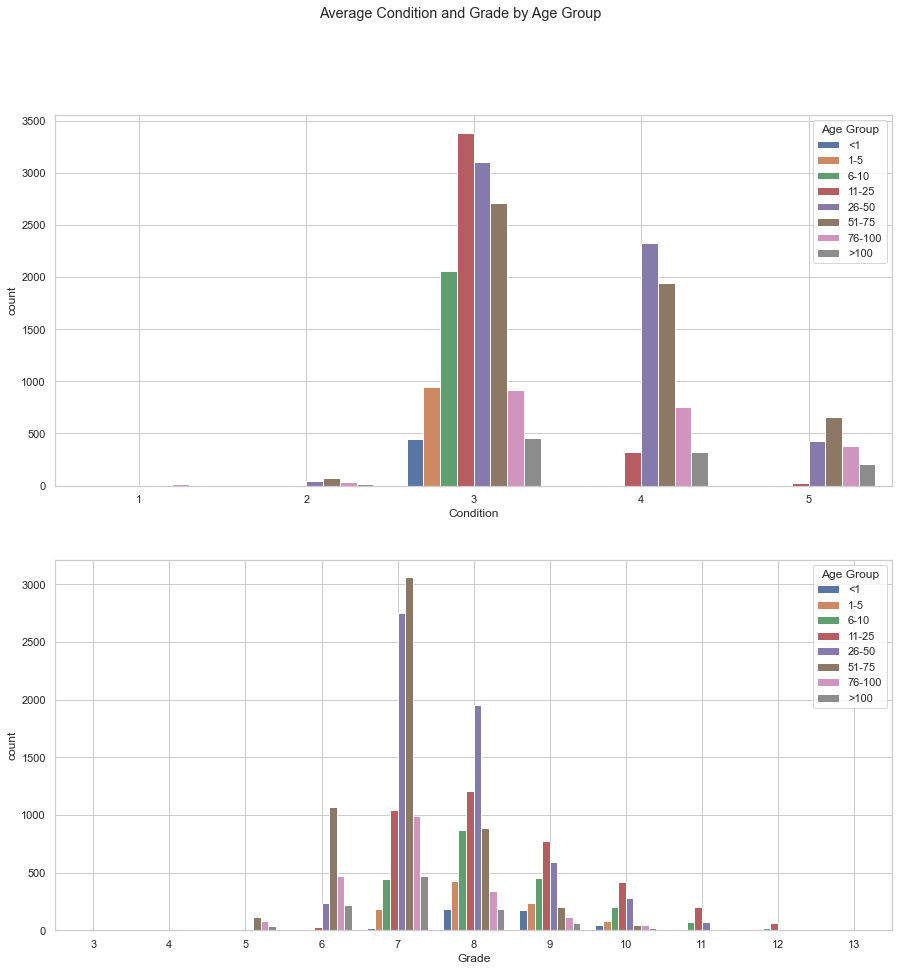

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.countplot(data=df, x='condition', hue='age_bin', ax=ax[0])
sns.countplot(data=df, x='grade', hue='age_bin', ax=ax[1])

plt.suptitle('Average Condition and Grade by Age Group')

ax[0].set_xlabel('Condition')
ax[1].set_xlabel('Grade')

ax[0].legend(title='Age Group', loc='upper right')
ax[1].legend(title='Age Group', loc='upper right')

ax[0].grid(True)
ax[1].grid(True)

plt.savefig('images/agegroup_vs_grade_condition.png')

Interestingly enough, the plot indicates that newer houses (below 20 years) stay on an average condition of 3.0, while older houses have a higher average condition than newer ones.

Im comparison, when looking at the King County Grade we see that there is a different tendency shown, where older houses have an lower/decreasing average grade. 

However, while the condition is used to describe the overall condition of the house, the grading system is taking design and construction into consideration, which might be impact the lower average for older properties.

Thus, while we can conclude that thee condition and grade are depending on the age of a property, further investigation is needed to find out the fine points of these two scores. Also while the age does not seem to be impacting the overall condition negatively, we did not take into consideration potential renovations undertaken and a lot of the houses we looked at might have been renovated already, thus, making the yr_built not the most insightful feature.

<br>

#### 3. The number of bedrooms has a higher impact on the house pricing, than the number of bathrooms

For the third hypothesis, we are looking in the impact the bedrooms and bathrooms have on the property, with the assumption that the bedrooms are the more relevant driver for the overall pricing level.

However, as we already have seen in the correlation heatmap, the bedrooms have less of a positive correlation with the total price, than the bathrooms.

To recapture on this, we are drawing two boxplots, one for bedrooms, one for bathrooms.

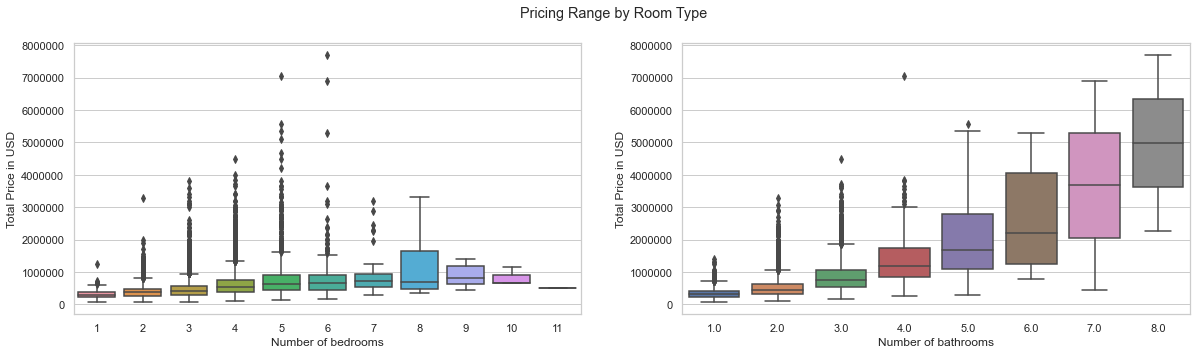

In [133]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

sns.boxplot(x='bedrooms', y='price', data=df, ax=ax[0])
sns.boxplot(x='bathrooms', y='price', data=df, ax=ax[1])

plt.suptitle('Pricing Range by Room Type')

ax[0].set_xlabel('Number of bedrooms')
ax[1].set_xlabel('Number of bathrooms')
ax[0].set_ylabel('Total Price in USD')
ax[1].set_ylabel('Total Price in USD')

ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y')

plt.savefig('images/price_roomtype.png')

We can already see that the median price range is increasing more strongly for the amount of bathrooms than for the bedrooms, indicating that the bathrooms might cause a higher average selling price.

We will for the next step remove the .5 bathrooms, to get a direct comparison between the bedrooms and the bathrooms. For this purpose we are rounding the half bathrooms down (with the exception of the 0.5) and plot the amount of bedrooms and bathrooms in relation to the average price.

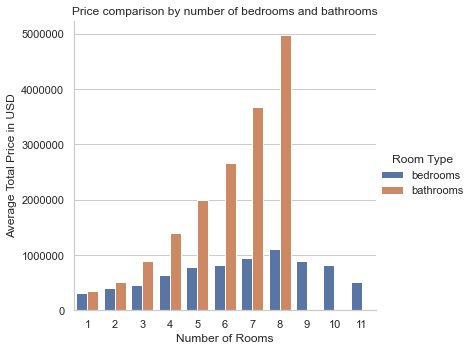

In [113]:
df['bathrooms'] = df['bathrooms'].replace({0.5:1, 1.5:2, 2.5:2, 3.5:3, 4.5:4, 5.5:5, 6.5:6, 7.5:7})

bedrooms = df.groupby('bedrooms').mean()['price'].reset_index()
bathrooms = df.groupby('bathrooms').mean()['price'].reset_index()

bed_bath = pd.concat([bedrooms, bathrooms], axis=1)

bed_bath = bed_bath.drop('bathrooms', axis=1)
bed_bath.columns = ['number', 'bedrooms', 'bathrooms']

bed_bath = pd.melt(bed_bath, id_vars="number", var_name="Room Type", value_name="average_price")

sns.catplot(x='number', y='average_price', hue='Room Type', data=bed_bath, kind='bar')

plt.title('Price comparison by number of bedrooms and bathrooms')

plt.xlabel('Number of Rooms')
plt.ylabel('Average Total Price in USD')

plt.ticklabel_format(style='plain', axis='y')

plt.savefig('images/price_roomtype_comparison.png')

Based on this visualization, the average pricing increases more strongly with an increase of the bathrooms.

Thus, we can conclude that our hypothesis was not correct and that the amount of bathrooms is a bigger driver for the price as the amount of bedrooms.

### The stakeholder

After concluding our three hypothesis, we will introduce the stakeholder for the last part.

Kindly meet, Larry Sanders. He wants to buy a house, preferably at the waterfront. It should be nice and central, but a bit out the crowded areas. He has children, but prefers his own space, meaning many interactions with the neighbors should not be necessary... or rather avoided... especially, if they have kids.

The big catch: he only has a limited budget.


| Name | Type | Wishes |  
| --- | --- | --- |
| Larry Sanders | Buyer | Waterfront, limited budget, nice & isolated but central neighborhood without kids |


As we only have limited information available about Larry Sanders, we are going to make some assumptions:
- limited budget: we will try to stay below the median pricing, as we see this limited budget rather as a below average indicator
- central: we move a bit outside of the main Seattle region, but do not move to the countryside, this way we should also hopefully manage the next criteria:
- isolated: as the countryside is not an option, we will look for places with a bigger than average lot and a bigger than average lot15 feature
- kids: we will look for a property with at least 2 bedrooms and 1.5 bathrooms
- waterfront: this is treated as a nice to have, but will be the criteria, which we move away from if needed first (based on the briefing we got, this was more a 'nice to have' feature)


<br>
<br>

We will start by creating a dataframe, which solely serves the purpose of finding Larry a nice house to by in the area of King County.

In [105]:
df_stakeholder = df.query('price < price.median() and bedrooms >= 3 and bathrooms >= 2 and sqft_lot15 > sqft_lot15.quantile(0.75) and waterfront == 1.00 ')

fig = px.scatter_mapbox(df_stakeholder, lat="lat", lon="long", hover_name="zipcode", color='price_group_sqft_living',  hover_data=["bedrooms", "bathrooms", "yr_built", 'yr_renovated'],
                        size='zipcode', color_discrete_sequence=px.colors.cyclical.IceFire, zoom=8, height=700, title="Findings based on all requirements")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

df_stakeholder[['price', 'bedrooms','bathrooms', 'sqft_living', 'yr_built']]

price  bedrooms  bathrooms  sqft_living  yr_built
11544  357000         3       2.00         2460      1955
8270   400000         3       2.00         2090      1919
18833  380000         3       2.00         1980      1984

![](images/all_wishes.png)

When looking into fulfilling all the requirements of our stakeholder, we only find minor matches and it is very unlikely that a suitable house will be found for purchasing.

Thus, the first recommendation is:
- move away from the waterfront feature

We already saw in the data exploration phase, that the waterfront feature is only available for a minor amount of properties within our dataset and that the waterfront is also a driver for price.
Thus, this decreases the potential options drastically and when removed, gives further possibilities.

Let us shortly look at this plots again.

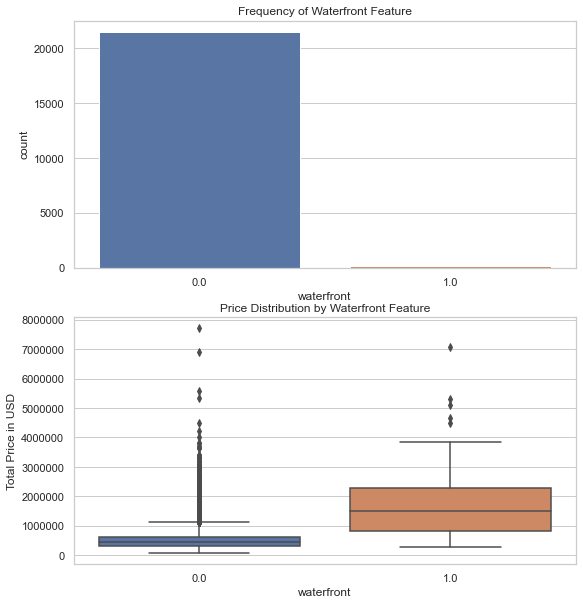

In [134]:
fig, ax = plt.subplots(2,1, figsize=(9, 10))

sns.countplot(df['waterfront'], ax=ax[0])
sns.boxplot(x='waterfront', y='price', data=df, ax=ax[1])

ax[0].set_title('Frequency of Waterfront Feature')
ax[1].set_title('Price Distribution by Waterfront Feature')

ax[1].set_ylabel('Total Price in USD')

ax[1].ticklabel_format(style='plain', axis='y')

plt.savefig('images/waterfront.png')

In [107]:
df_stakeholder = df.query('price < price.median() and bedrooms >= 3 and bathrooms >= 2 and sqft_lot15 > sqft_lot15.quantile(0.75)')

fig = px.scatter_mapbox(df_stakeholder, lat="lat", lon="long", hover_name="zipcode", color='price_group_sqft_living',  #hover_data=["city", "state", "country"],
                        color_discrete_sequence=px.colors.cyclical.IceFire, zoom=8, height=700, title="Findings without waterfront")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

![](images/wishes_wo_waterfront.png)

<br>

Just removing this feature already increases our possibilities within the market and thus, allows us to focus more on the other features available.

Therefore, the first recommendation is to re-evaluate the waterfront requirement and removing this feature as it allows to focus additional values into other parts of the wishlist.

<br>

Thus, as isolation was an important aspect of our stakeholder requirements, we will increase the level of this feature. This would be the second recommendation.
This way the isolation can be put further in focus, making sure that Larry can live in peace and germfree.

In [108]:
df_stakeholder = df.query('price < price.median() and bedrooms >= 3 and bathrooms >= 2 and sqft_lot15 > sqft_lot15.quantile(0.90)')

fig = px.scatter_mapbox(df_stakeholder, lat="lat", lon="long", hover_name="zipcode", color='price_group_sqft_living',  #hover_data=["city", "state", "country"],
                        color_discrete_sequence=px.colors.cyclical.IceFire, zoom=8, height=700, title="Findings without waterfront, increase in lot size")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

![](images/wishes_wo_waterfront_big_lots.png)

While this step already gives us some insight into districts with more spacious house lots, we will again aggregate that data on zip code level and look into zip code recommendation.

In [109]:
# create a new data frame with price per sqft, longitude and latitude grouped by the ZIP code
zipcode_lot_size = df.groupby('zipcode').mean()[['sqft_lot15', 'long', 'lat']].reset_index()

zipcode_stakeholder = zipcode_lot_size.sort_values('sqft_lot15', ascending=False)['zipcode'].head(10).to_list()
print(zipcode_stakeholder)

# plot the zip codes and the average price per sqft on the average longitude and latitude of King County
fig = px.scatter_mapbox(zipcode_lot_size, lat="lat", lon="long", hover_name="zipcode", color='sqft_lot15', #hover_data=["city", "state", "country"],
                        size='sqft_lot15', color_discrete_sequence=px.colors.cyclical.IceFire, zoom=9, height=900,
                        title="King County - average lot size by ZIP code")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()

[98070, 98024, 98014, 98022, 98010, 98077, 98019, 98045, 98092, 98053]


![](images/zipcode_size.png)

<br>

This visualization gives a good insight into the the areas, which are more spacious. Unsurprisingly, the central location is one of the trickier parts to fullfil with the isolation requirement in mind.

But next, we will look into the actual amount of potential houses and their location in detail.

In [110]:
df_stakeholder = df.query('price < price.median() and bedrooms >= 2 and bathrooms >= 2 and sqft_living > sqft_living.median() and sqft_lot15 > sqft_lot15.quantile(0.9) and zipcode.isin([98070, 98024, 98014, 98022, 98010, 98077, 98019, 98045, 98092, 98053])')

fig = px.scatter_mapbox(df_stakeholder, lat="lat", lon="long", hover_name="zipcode", color='price_group_sqft_living',  #hover_data=["city", "state", "country"],
                        size='sqft_lot15', color_discrete_sequence=px.colors.cyclical.IceFire, zoom=8, height=700, title="Areas with big lots")

fig.update_layout(
    mapbox_style="open-street-map",
)

fig.show()


![](images/wishes_isolation.png)

<br>

The increase of the sqft_lot15 requirement to focus on the upper 10% in regards of size, as well as only taking into consideration the 10 ZIP code areas with the widest average sqft_lot15 feature is narrowing down the options again.

However, the central location, is difficult to combine with the isolation part. Thus, as a last recommendation, I would look into the possibilities of easy connection to central areas and recommend a spacious outskirt area, with a easy connection to more central locations.

### Future recommendations

- get additional insights  into the condition and grade feature to understand  how they are constructed and thus, to identify why older houses tend to have a higher condition, but a lower average grade
- get updated data set for more than one years and look into the development of the house market over the years, especially in regards of best timing to sell and buy a property
- get additional data to supplement the housing data set, e.g. data on crime rates, school opportunities, infrastructure to complement the data available here and make rounder recommendations

In [111]:
df['date'].max()

Timestamp('2015-05-27 00:00:00')